# PM hw 08

최재필

** 폰트 스타일 적용 - 같은 cell 안에 있어야 작동... 

<style>
    red {
        color: red;
    }

    blue {
        color: lightblue;
    }

    green {
        color: lightgreen;
    }
</style>

In [33]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from itertools import permutations

## Summarize

Investment - Zvi Bodie

Chapter 24: Portfolio Performance Evaluation

### 24.1 The conventional theory of performance evaluation

- Average
    - Arithmetic mean
    - Geometric mean (is time-weighted return)
- Time Weighted Return (TWR) VS Money Weighted Return (MWR)
    - multi-period에서 원금이 추가되거나 빠질 때 계산이 복잡해진다. 
    - MWR (is Internal Rate of Return, IRR)
        - 포트폴리오에 돈이 더 많이 들어있을 때 수익률이 좋아 더 많은 돈을 벌면 MWR이 많이 올라감. 
    - TWR 
        - 각 기간마다 수익률을 geo mean 해주는 것이기 때문에 돈이 많을 때나 적을 때나 수익률의 가중이 같음. 

#### 질문:

1. zero-investment portfolio의 경우는? PnL 말고 % return으로 표현 가능? 
2. TWR, MWR에서 period 의 기준은? 
    - MWR은 money inflow/outflow 있을 때마다?
    - TWR은 일정한 간격의 기간?


- Risk Adjusted Return
    - 수익률로만 적당히 passive benchmark와 상대비교하는 방법:
        - 펀드 매니저들의 성과를 평가할 때 사용
        - 비슷한 risk characteristic을 가진 그룹을 comparison universe로 지정하고, 그 안에서 비교
        - 주로 TWR을 사용해 매니저들의 성과를 분기별로 box plot으로 찍어 비교함. 
    - Risk-Adjusted Performance Measures
        -  Sharpe Ratio 
            - $ \frac{\bar{r_p} - \bar{r_f}}{\sigma_p} $
            - 초과수익률을 포트폴리오 std로 나눔
        - Treynor measure
            - $ \frac{\bar{r_p} - \bar{r_f}}{\beta_p} $
            - 초과수익률을 베타로 나눔
            - fund-of-fund 운용시 유용하게 쓰일 수 있음. 
                - 이미 component가 fund이기 때문에 nonsystematic risk는 희석된 상태
                - 각 펀드를 $ M^2 $ 처럼 T-bill을 강제로 섞어 beta를 1로 통일시켜주고, return을 비교 ( $ T^2 $ Measure)
        - Jensen's Alpha
            - $ \alpha_p = \bar{r_p} - (\bar{r_f} + \beta_p(\bar{r_M} - \bar{r_f})) $
            - CAPM으로 베타 추정해 남은 절편을 alpha로 봄
        - Information Ratio
            - $ \frac{\alpha_p}{\sigma(e_p)} $
            - Jensen's Alpha를 nonsystemic risk의 std로 나눠줌
            - nonsystemic risk = tracking error 
                - 당연히 Market은 tracking error = 0
            - 헤지펀드 평가에 유용하게 쓰일 수 있음. 
                - trade-off between alpha & diversifiable risk 
    - Sharpe Ratio
        - 그 차이를 비교하기 위해: $ M^2 $ (Modigliani-squared) 사용
            - 강제로 T-bill (risk free asset)을 섞어 비교하려는 Rm 과 std를 match 시켜주고 수익률 비교

## Problem 1


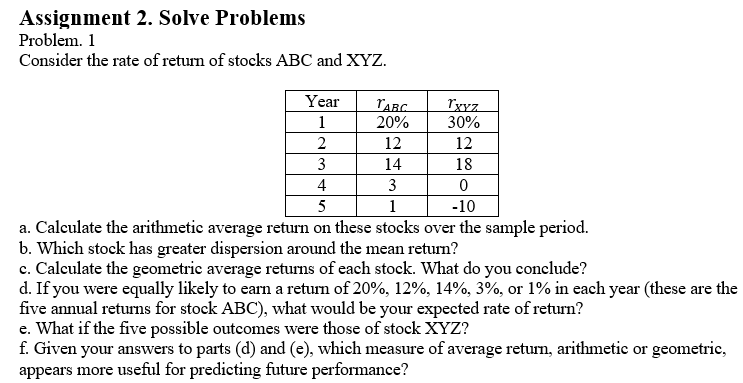

In [4]:
years = np.array([1, 2, 3, 4, 5])
r_ABC = np.array([0.2, 0.12, 0.14, 0.03, 0.01])
r_XYZ = np.array([0.3, 0.12, 0.18, 0.0, -0.1])

In [7]:
df = pd.DataFrame(index=years, columns=['r_ABC', 'r_XYZ'], data=np.array([r_ABC, r_XYZ]).T)
df

,r_ABC,r_XYZ
1,0.20,0.30
2,0.12,0.12
3,0.14,0.18
4,0.03,0.00
5,0.01,-0.10


### a. arithmetic average return

In [8]:
df.mean()

r_ABC    0.1
r_XYZ    0.1
dtype: float64

### b. dispersion around the mean return

In [10]:
df - df.mean()

,r_ABC,r_XYZ
1,0.10,0.20
2,0.02,0.02
3,0.04,0.08
4,-0.07,-0.10
5,-0.09,-0.20


### c. geometric return

= time-weighted average. (each return has an equal weight)

In [13]:
(df+1).prod().pow(1/5) - 1

r_ABC    0.097722
r_XYZ    0.091081
dtype: float64

In [18]:
np.exp(np.log(df+1).mean()) - 1

r_ABC    0.097722
r_XYZ    0.091081
dtype: float64

Although the two have the same arithmetic mean, ABC has higher geometric mean. 

Difference: geometric mean considers compounded growth - more appropriate

In [21]:
expd_arith = df.expanding().mean()
expd_geo = df.expanding().apply(lambda x: np.exp(np.log(x+1).mean()) - 1)

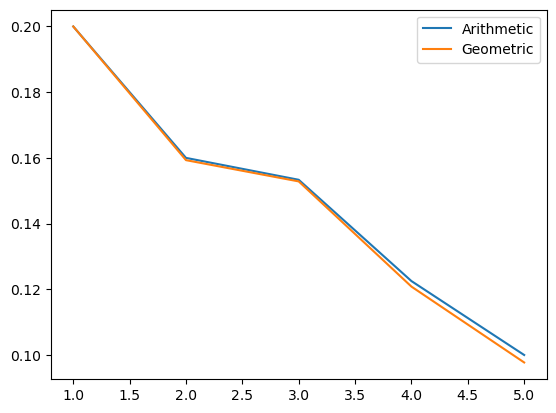

In [31]:
expd_arith['r_ABC'].plot()
expd_geo['r_ABC'].plot()

plt.legend(['Arithmetic', 'Geometric'])

### d., e. Expected rate of return

막상 구현해보니 모든 조합을 permutation 하는 것이었다. 

즉, 그냥 geometric mean이다. 

In [42]:
np.exp(np.log(df+1).mean()) - 1

r_ABC    0.097722
r_XYZ    0.091081
dtype: float64

### f. arithmetic vs geometric 

geometric 승. 더 유용함. 

### 

## Problem 2

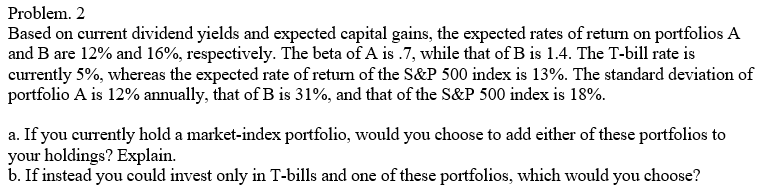

In [43]:
expA = 0.12
expB = 0.16

betaA = 0.7
betaB = 1.4

tbill = 0.05
SP500 = 0.13

stdA = 0.12
stdB = 0.31
stdSP500 = 0.18



### a. SP500 vs A vs B

In [44]:
# from sharpe ratio perspective

sharpeA = (expA - tbill) / stdA
sharpeB = (expB - tbill) / stdB
sharpeSP500 = (SP500 - tbill) / stdSP500

sharpeA, sharpeB, sharpeSP500

(0.5833333333333333, 0.3548387096774194, 0.4444444444444445)

In [45]:
# from treynor ratio perspective

treynorA = (expA - tbill) / betaA
treynorB = (expB - tbill) / betaB
treynorSP500 = (SP500 - tbill) / 1

treynorA, treynorB, treynorSP500

(0.09999999999999999, 0.07857142857142858, 0.08)

두 방법으로 모두 봐도 A로 갈아타는 것이 나음

### b. tbill vs portfolio

tbill의 경우 risk free라서 std = 0이고, beta = 0이다. 

sharpe나 treyvor로 measure할 수 없다. 

다만 포트폴리오 이론의 efficient frontier 관점에서 봤을 때 나의 risk-return utility indifference curve가 일반적으로 concave 하다면, 100% tbill이 아닌 efficient frontier 위의 점을 선택하게 된다. 

## Problem 3

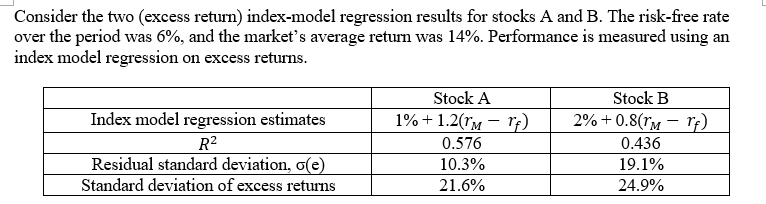

In [49]:
Rf = 0.06
Rm = 0.14

In [54]:
RsqrA = 0.576
RsqrB = 0.436

In [51]:
residual_stdA = 0.103
residual_stdB = 0.191

In [56]:
excessRet_stdA = 0.216
excessRet_stdB = 0.249

## 사실, rf는 상수이기 때문에 각각 stdA, stdB와 같다

In [71]:
betaA = 1.2
betaB = 0.8

# ?? beta of A, B 와 R squared 의 관계를 통해 std market를 구해야 해서 있는거 아닌가? 

### a. calculate statistics

$ \alpha_p = \bar{r_p} - \bar{r_f} - \beta_p(\bar{r_M} - \bar{r_f}) $

젠센의 알파 공식에 따라, 

위 결과는 $ \bar{r_p} $에 대해 regression 한 결과이므로 

In [67]:
# alpha
retA = 0.01 + 1.2 * (Rm - Rf)
retB = 0.02 + 0.8 * (Rm - Rf)


In [65]:
alphaA = 0.01 - Rf
alphaB = 0.02 - Rf

In [66]:

alphaA, alphaB

(-0.049999999999999996, -0.039999999999999994)

In [68]:
# information ratio

infoA = alphaA / residual_stdA
infoB = alphaB / residual_stdB

infoA, infoB

(-0.4854368932038835, -0.20942408376963348)

In [69]:
# sharpe ratio

sharpeA = (retA - Rf) / excessRet_stdA
sharpeB = (retB - Rf) / excessRet_stdB

sharpeA, sharpeB

(0.21296296296296302, 0.09638554216867479)

In [73]:
# treynor ratio

treyA = (retA - Rf) / betaA
treyB = (retB - Rf) / betaB

treyA, treyB

(0.038333333333333344, 0.030000000000000027)

### b. In the following situations, which of A & B is better?

- ... is the only risky asset 
    - A, based on sharpe ratio
- ... will be mixed with the rest of the investor's portfolio, currently composed solely of holdings in the market-index fund
    - A, based on Treynor ratio
- ... is one of many stocks that the investor is analyzing to form an actively managed stock portfolio.
    - B, based on information ratio
